In [3]:
from fastbook import *
from fastai.vision.widgets import *


## Get Images

In [4]:
# TODO: put env key in paperspace, not in notebook
key = os.environ.get('BING_SEARCH_KEY', '66405a13e4a44223a3586ba1ef7514c4')

In [5]:
??search_images_bing

In [60]:
wizard_types = 'gandalf', 'dumbledore', 'saruman'
path = Path('wizards')

if not path.exists():
    path.mkdir()

    for wizard in wizard_types:
        dest = (path/wizard)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{wizard}')
        download_images(dest, urls=results.attrgot('contentUrl')) # this changed from the book, it used to be content_url

In [66]:
# note: get_image_files will not get files that have query params or similar malformed paths
# should check the fastai forums and submit a PR for a fix
imgs = get_image_files(path)
imgs

(#290) [Path('wizards/saruman/00000061.jpg'),Path('wizards/saruman/00000055.jpg'),Path('wizards/saruman/00000040.jpg'),Path('wizards/saruman/00000010.jpg'),Path('wizards/saruman/00000001.jpg'),Path('wizards/saruman/00000110.jpg'),Path('wizards/saruman/00000033.jpg'),Path('wizards/saruman/00000126.jpg'),Path('wizards/saruman/00000002.jpg'),Path('wizards/saruman/00000133.jpg')...]

### Remove corrupt images

In [62]:
failed = verify_images(imgs)
failed

(#1) [Path('wizards/dumbledore/00000020.jpg')]

In [63]:
# Path.unlink will delete the image
failed.map(Path.unlink)

(#1) [None]

In [52]:
## Only run this when importing images for the first time OR adding new images.

# The images from Bing image search will sometimes have query params in the filename
#     this will cause an error when the image opens.


# path = Path('wizards')
# imgs = get_files(path)

# for path in imgs:
#     pathstr = str(path)
#     if pathstr.find('?') != -1:
#         name, _ = pathstr.split('?')
#         path.rename(name)
#         print(name)

In [53]:
doc(DataBlock)

In [64]:
wizards = DataBlock(
    blocks = (ImageBlock, CategoryBlock), # (independent variable, dependent variables)
    get_items = get_image_files,
    # set the Random Number to a fixed number to get the same results upon rerunning the notebook
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y =  parent_label, # parent_label gets the folder names from the images
    item_tfms = Resize(128), # images need to be the same size in order to do inference - images are transformed into arrays of x and y dimension
)

In [67]:
# tell fastai where the data lives and create the dataloaders object
dls = wizards.dataloaders(path)

### Image augmentation

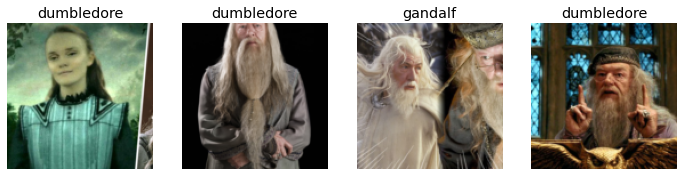

In [68]:
dls.show_batch(max_n=4, nrows=1)

In [87]:
wizards = wizards.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = wizards.dataloaders(path)

## Train the model

In [88]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.007492,1.396889,0.549020,00:05


epoch,train_loss,valid_loss,error_rate,time
0,1.120479,1.797614,0.627451,00:04
1,0.986525,1.570133,0.588235,00:05
2,0.801062,1.366560,0.470588,00:05
3,0.691160,1.349889,0.431373,00:05


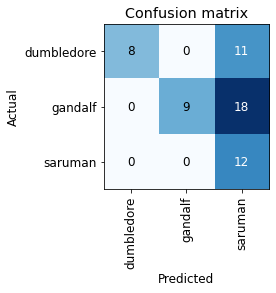

In [71]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

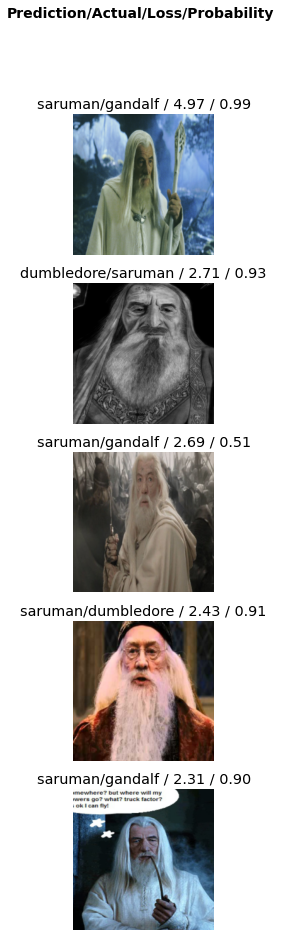

In [70]:
interp.plot_top_losses(5, nrows=5)

## Data Cleaning

In [82]:
cleaner = ImageClassifierCleaner(learn)
cleaner

FileNotFoundError: Caught FileNotFoundError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/opt/conda/envs/fastai/lib/python3.8/site-packages/torch/utils/data/_utils/worker.py", line 198, in _worker_loop
    data = fetcher.fetch(index)
  File "/opt/conda/envs/fastai/lib/python3.8/site-packages/torch/utils/data/_utils/fetch.py", line 34, in fetch
    data = next(self.dataset_iter)
  File "/opt/conda/envs/fastai/lib/python3.8/site-packages/fastai/data/load.py", line 118, in create_batches
    yield from map(self.do_batch, self.chunkify(res))
  File "/opt/conda/envs/fastai/lib/python3.8/site-packages/fastcore/basics.py", line 216, in chunked
    res = list(itertools.islice(it, chunk_sz))
  File "/opt/conda/envs/fastai/lib/python3.8/site-packages/fastai/data/load.py", line 133, in do_item
    try: return self.after_item(self.create_item(s))
  File "/opt/conda/envs/fastai/lib/python3.8/site-packages/fastai/data/load.py", line 140, in create_item
    if self.indexed: return self.dataset[s or 0]
  File "/opt/conda/envs/fastai/lib/python3.8/site-packages/fastai/data/core.py", line 319, in __getitem__
    res = tuple([tl[it] for tl in self.tls])
  File "/opt/conda/envs/fastai/lib/python3.8/site-packages/fastai/data/core.py", line 319, in <listcomp>
    res = tuple([tl[it] for tl in self.tls])
  File "/opt/conda/envs/fastai/lib/python3.8/site-packages/fastai/data/core.py", line 285, in __getitem__
    return self._after_item(res) if is_indexer(idx) else res.map(self._after_item)
  File "/opt/conda/envs/fastai/lib/python3.8/site-packages/fastai/data/core.py", line 247, in _after_item
    def _after_item(self, o): return self.tfms(o)
  File "/opt/conda/envs/fastai/lib/python3.8/site-packages/fastcore/transform.py", line 198, in __call__
    def __call__(self, o): return compose_tfms(o, tfms=self.fs, split_idx=self.split_idx)
  File "/opt/conda/envs/fastai/lib/python3.8/site-packages/fastcore/transform.py", line 150, in compose_tfms
    x = f(x, **kwargs)
  File "/opt/conda/envs/fastai/lib/python3.8/site-packages/fastcore/transform.py", line 73, in __call__
    def __call__(self, x, **kwargs): return self._call('encodes', x, **kwargs)
  File "/opt/conda/envs/fastai/lib/python3.8/site-packages/fastcore/transform.py", line 83, in _call
    return self._do_call(getattr(self, fn), x, **kwargs)
  File "/opt/conda/envs/fastai/lib/python3.8/site-packages/fastcore/transform.py", line 89, in _do_call
    return retain_type(f(x, **kwargs), x, ret)
  File "/opt/conda/envs/fastai/lib/python3.8/site-packages/fastcore/dispatch.py", line 118, in __call__
    return f(*args, **kwargs)
  File "/opt/conda/envs/fastai/lib/python3.8/site-packages/fastai/vision/core.py", line 110, in create
    return cls(load_image(fn, **merge(cls._open_args, kwargs)))
  File "/opt/conda/envs/fastai/lib/python3.8/site-packages/fastai/vision/core.py", line 85, in load_image
    im = Image.open(fn)
  File "/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py", line 2878, in open
    fp = builtins.open(filename, "rb")
FileNotFoundError: [Errno 2] No such file or directory: '/storage/notebooks/wizards/saruman/00000077.jpg'


In [81]:
# IMPORTANT: You will need to run this cell once before changing the dropdown selection
# ImageClassifierCleaner retains no memory of previous selections


for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [83]:
wizards = wizards.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = wizards.dataloaders(path)